## Cluster separation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

data=pd.read_excel("price.xlsx")
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,Brent_price,WTI_price
0,2020-08-28,45.26,42.93
1,2020-08-21,44.79,42.73
2,2020-08-14,44.54,42.08
3,2020-08-07,44.36,41.57
4,2020-07-31,43.22,40.69


In [3]:
data.shape

(1809, 3)

In [4]:
print(f"Missing values in each variable: \n{data.isnull().sum()}")

Missing values in each variable: 
date           71
Brent_price    71
WTI_price       0
dtype: int64


In [5]:
print(f"Variable:                  Type: \n{data.dtypes}")

Variable:                  Type: 
date           datetime64[ns]
Brent_price           float64
WTI_price             float64
dtype: object


In [6]:
data.plot.scatter("date","WTI_price",label='price')
plt.title("Date vs WTI price")
plt.grid()
plt.legend()
plt.show()

ValueError: scatter requires x column to be numeric

In [7]:
data.plot.scatter("date","Brent_price",label='price')
plt.title("Date vs Brent price")
plt.grid()
plt.legend()
plt.show()

ValueError: scatter requires x column to be numeric

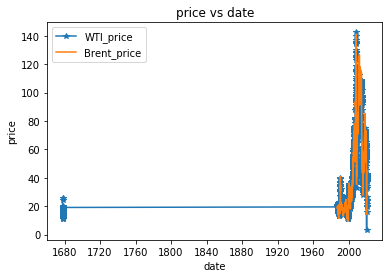

In [8]:
fig,ax=plt.subplots()
ax.plot("date","WTI_price", data=data, marker="*")
ax.set_xlabel("date")
ax.set_ylabel("price")
ax.plot("date","Brent_price", data=data)
plt.legend()
plt.title("price vs date")
plt.show()

In [9]:
print (data.describe())

       Brent_price    WTI_price
count  1738.000000  1809.000000
mean     46.443044    44.072056
std      32.475511    28.973543
min       9.440000     3.320000
25%      18.792500    19.770000
50%      32.205000    31.350000
75%      67.012500    62.640000
max     141.070000   142.520000


In [10]:
import seaborn as sns
ax = sns.boxplot(x=data["Brent_price"],palette="Set2")

ModuleNotFoundError: No module named 'seaborn'

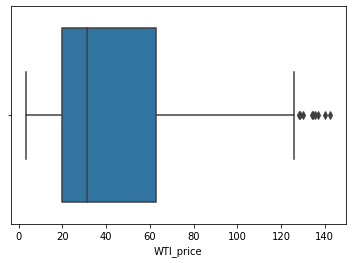

In [5]:
ax = sns.boxplot(x=data["WTI_price"])

In [11]:
rc_data=pd.read_excel("rig_count.xlsx")
rc_data['Date'] = pd.to_datetime(rc_data['Date'])
rc_data.head()

,Date,Total
0,2020-09-04,256
1,2020-08-28,254
2,2020-08-21,254
3,2020-08-14,244
4,2020-08-07,247


In [12]:
rc_data.shape

(1730, 2)

In [13]:
print(f"Missing values in each variable: \n{rc_data.isnull().sum()}")

Missing values in each variable: 
Date     0
Total    0
dtype: int64


In [14]:
print(f"Variable:                  Type: \n{rc_data.dtypes}")

Variable:                  Type: 
Date     datetime64[ns]
Total             int64
dtype: object


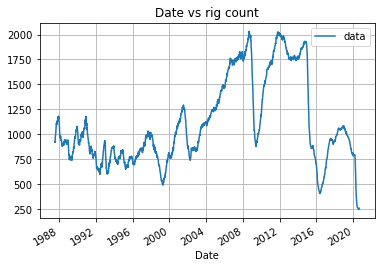

In [15]:
rc_data.plot("Date","Total",label='data')
plt.title("Date vs rig count")
plt.grid()
plt.legend()
plt.show()

In [16]:
print (rc_data.describe())

             Total
count  1730.000000
mean   1111.473988
std     431.664545
min     244.000000
25%     797.250000
50%     972.000000
75%    1443.250000
max    2031.000000


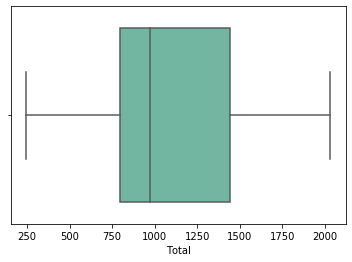

In [22]:
ax = sns.boxplot(x=rc_data["Total"],palette="Set2")

In [17]:
summary=[]
i=0
for k in rc_data['Date']:
    for j in data['date']:
        if k==j:
            brent=data["Brent_price"][i]
            wti=data["WTI_price"][i]
            rc=rc_data["Total"][i]
            sum_= {'Date':j,'Brent':brent,'WTI':wti,'rig_count':rc}
            summary.append(sum_)
            i=1+i
        
sm = pd.DataFrame(data=summary)
        
print(sm)    

      Brent       Date    WTI  rig_count
0     45.26 2020-08-28  42.93        256
1     44.79 2020-08-21  42.73        254
2     44.54 2020-08-14  42.08        254
3     44.36 2020-08-07  41.57        244
4     43.22 2020-07-31  40.69        247
5     43.57 2020-07-24  41.34        251
6     43.40 2020-07-17  40.57        251
7     43.06 2020-07-10  40.44        253
8     42.30 2020-06-26  39.85        258
9     41.69 2020-06-19  39.22        263
10    40.95 2020-06-12  38.35        265
11    39.52 2020-06-05  37.87        266
12    38.37 2020-05-29  37.32        279
13    33.70 2020-05-22  34.19        284
14    33.94 2020-05-15  33.10        301
15    28.18 2020-05-08  26.40        318
16    23.57 2020-05-01  23.46        339
17    17.05 2020-04-24  15.71        374
18    14.24 2020-04-17   3.32        408
19    20.00 2020-04-03  20.12        465
20    22.53 2020-03-27  24.41        529
21    18.72 2020-03-20  21.69        602
22    23.96 2020-03-13  19.44        664
23    25.65 2020

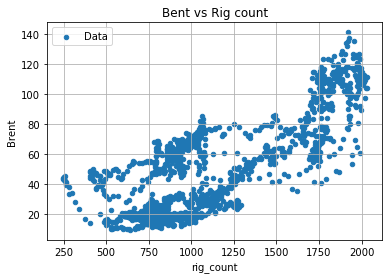

In [18]:
sm.plot.scatter("rig_count","Brent",label='Data')
plt.title("Bent vs Rig count")
plt.grid()
plt.legend()
plt.show()

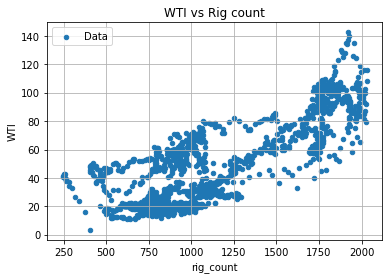

In [19]:
sm.plot.scatter("rig_count","WTI",label='Data')
plt.title("WTI vs Rig count")
plt.grid()
plt.legend()
plt.show()

Mean squared error: 17.42992389837753
coefficient of determination: 0.7131434565141164


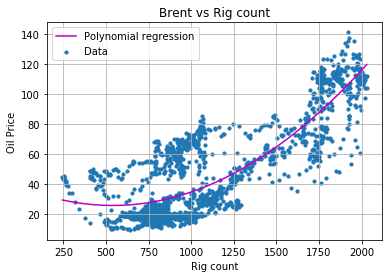

In [35]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


Oil_Price_y = sm["Brent"][:, np.newaxis]
Rig_count_x= sm["rig_count"][:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(Rig_count_x)

model = LinearRegression()
model.fit(x_poly, Oil_Price_y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Oil_Price_y,y_poly_pred))
r2 = r2_score(Oil_Price_y,y_poly_pred)
print('Mean squared error:',rmse)
print('coefficient of determination:', r2)

plt.scatter(Rig_count_x, Oil_Price_y, s=10,label='Data')
plt.xlabel('Rig count')
plt.ylabel('Oil Price')

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(Rig_count_x,y_poly_pred), key=sort_axis)
Rig_count_x, y_poly_pred = zip(*sorted_zip)
plt.plot(Rig_count_x, y_poly_pred, color='m', label='Polynomial regression')
plt.title("Brent vs Rig count")
plt.grid()
plt.legend()
plt.show()

Mean squared error: 15.352069272958802
coefficient of determination: 0.719567324472618


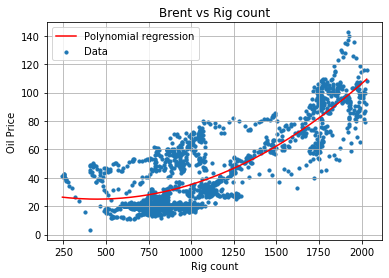

In [37]:
Oil_Price_y = sm["WTI"][:, np.newaxis]
Rig_count_x= sm["rig_count"][:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(Rig_count_x)

model = LinearRegression()
model.fit(x_poly, Oil_Price_y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Oil_Price_y,y_poly_pred))
r2 = r2_score(Oil_Price_y,y_poly_pred)
print('Mean squared error:',rmse)
print('coefficient of determination:', r2)

plt.scatter(Rig_count_x, Oil_Price_y, s=10,label='Data')
plt.xlabel('Rig count')
plt.ylabel('Oil Price')

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(Rig_count_x,y_poly_pred), key=sort_axis)
Rig_count_x, y_poly_pred = zip(*sorted_zip)
plt.plot(Rig_count_x, y_poly_pred, color='red', label='Polynomial regression')
plt.title("Brent vs Rig count")
plt.grid()
plt.legend()
plt.show()

In [38]:
print (sm.describe())

             Brent          WTI    rig_count
count  1652.000000  1652.000000  1652.000000
mean     48.009788    46.667203  1117.570218
std      32.553268    28.999072   440.345355
min       9.440000     3.320000   244.000000
25%      19.300000    20.752500   792.750000
50%      36.530000    37.230000   976.500000
75%      68.455000    66.082500  1481.250000
max     141.070000   142.520000  2031.000000


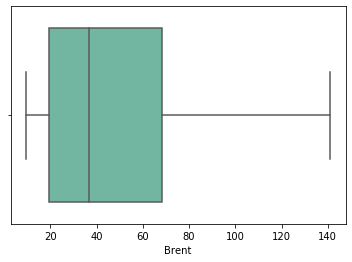

In [39]:
ax = sns.boxplot(x=sm["Brent"],palette="Set2")

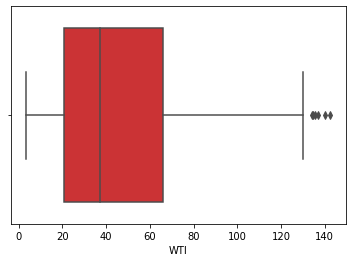

In [40]:
ax = sns.boxplot(x=sm["WTI"],palette="Set1")

In [23]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
from statsmodels.tools.eval_measures import mse, rmse, meanabs
grangercausalitytests(sm[['rig_count','WTI']],maxlag=30)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.1043 , p=0.0000  , df_denom=1648, df_num=1
ssr based chi2 test:   chi2=18.1373 , p=0.0000  , df=1
likelihood ratio test: chi2=18.0384 , p=0.0000  , df=1
parameter F test:         F=18.1043 , p=0.0000  , df_denom=1648, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3677  , p=0.0128  , df_denom=1645, df_num=2
ssr based chi2 test:   chi2=8.7620  , p=0.0125  , df=2
likelihood ratio test: chi2=8.7388  , p=0.0127  , df=2
parameter F test:         F=4.3677  , p=0.0128  , df_denom=1645, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5701  , p=0.0528  , df_denom=1642, df_num=3
ssr based chi2 test:   chi2=7.7433  , p=0.0516  , df=3
likelihood ratio test: chi2=7.7251  , p=0.0520  , df=3
parameter F test:         F=2.5701  , p=0.0528  , df_denom=1642, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.2385  , p=0.

{1: ({'ssr_ftest': (18.104298332653403, 2.2089102466383775e-05, 1648.0, 1),
   'ssr_chi2test': (18.137255186414304, 2.0554044793433435e-05, 1),
   'lrtest': (18.038354373735274, 2.164989107822284e-05, 1),
   'params_ftest': (18.104298332652913, 2.208910246638876e-05, 1648.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.367711161450679, 0.012827613157614009, 1645.0, 2),
   'ssr_chi2test': (8.761973758533278, 0.012513003701753624, 2),
   'lrtest': (8.738791493748067, 0.012658887429753267, 2),
   'params_ftest': (4.367711161450547, 0.012827613157615193, 1645.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.570127736914847, 0.052761791163652844, 1642.0, 3),
   'ssr_chi2test': (7.743253297513855, 0.05162687392407925, 3),
   'lrtest': (7.725129909797033, 0.05204750331954685, 3),
   'params_ftest': (2.570127736915275, 0.05276179116362103, 1642.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.]

In [33]:
newer_sm = sm.iloc[::-1].tail(500)

In [36]:
grangercausalitytests(newer_sm[['WTI','rig_count']],maxlag=60)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6289  , p=0.4281  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.6327  , p=0.4264  , df=1
likelihood ratio test: chi2=0.6323  , p=0.4265  , df=1
parameter F test:         F=0.6289  , p=0.4281  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5619  , p=0.5705  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.1351  , p=0.5669  , df=2
likelihood ratio test: chi2=1.1338  , p=0.5673  , df=2
parameter F test:         F=0.5619  , p=0.5705  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9571  , p=0.4128  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=2.9124  , p=0.4053  , df=3
likelihood ratio test: chi2=2.9039  , p=0.4067  , df=3
parameter F test:         F=0.9571  , p=0.4128  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7491  , p=0.5589  

ssr based F test:         F=0.8047  , p=0.8198  , df_denom=355, df_num=48
ssr based chi2 test:   chi2=49.1807 , p=0.4256  , df=48
likelihood ratio test: chi2=46.6846 , p=0.5268  , df=48
parameter F test:         F=0.8047  , p=0.8198  , df_denom=355, df_num=48

Granger Causality
number of lags (no zero) 49
ssr based F test:         F=0.7734  , p=0.8637  , df_denom=352, df_num=49
ssr based chi2 test:   chi2=48.5558 , p=0.4910  , df=49
likelihood ratio test: chi2=46.1156 , p=0.5908  , df=49
parameter F test:         F=0.7734  , p=0.8637  , df_denom=352, df_num=49

Granger Causality
number of lags (no zero) 50
ssr based F test:         F=0.8033  , p=0.8267  , df_denom=349, df_num=50
ssr based chi2 test:   chi2=51.7857 , p=0.4040  , df=50
likelihood ratio test: chi2=49.0165 , p=0.5128  , df=50
parameter F test:         F=0.8033  , p=0.8267  , df_denom=349, df_num=50

Granger Causality
number of lags (no zero) 51
ssr based F test:         F=0.8425  , p=0.7695  , df_denom=346, df_num=51
ssr b

{1: ({'ssr_ftest': (0.6289198172716209, 0.4281309881487402, 496.0, 1),
   'ssr_chi2test': (0.6327237677793123, 0.4263579747519791, 1),
   'lrtest': (0.6323229649015047, 0.4265045133103881, 1),
   'params_ftest': (0.6289198172750257, 0.4281309881475044, 496.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.5618559634284156, 0.5705145500733488, 493.0, 2),
   'ssr_chi2test': (1.1351085995430061, 0.5669102371048149, 2),
   'lrtest': (1.1338169158393612, 0.567276489720067, 2),
   'params_ftest': (0.5618559634261517, 0.5705145500746476, 493.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.957132795153732, 0.4127604650568817, 490.0, 3),
   'ssr_chi2test': (2.9124183623963558, 0.4053265872267462, 3),
   'lrtest': (2.9039181726166134, 0.40667756374820374, 3),
   'params_ftest': (0.9571327951513785, 0.4127604650580122, 490.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

In [35]:
newer_sm.head()

,Brent,Date,WTI,rig_count
499,100.36,2010-07-09,89.52,1721
498,99.90,2010-07-16,85.51,1713
497,102.81,2010-07-23,84.13,1699
496,110.49,2010-07-30,95.26,1707
495,114.53,2010-08-06,101.05,1715
